## Objectives:
- Following are some insights I have tried to answer.
    - What is proportion of train status and which line is having least and highest cancellation ratio?
    - Which is busiest line and what portion of line it takes?
    - On which line maximum delay occurs in terms of average time and maximum time?
    - On which days the maximum/minimum average and total delay occured?
    - On which day longest and shortest delay took place?
    - What are the possible causes of delay?
- To predict the delay time for future transit.


## Importing Libraries and Reading the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype
data = pd.read_csv("tranit_time_data.csv")

In [2]:
data.head(50)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2020-03-01,1837,1.0,Hoboken,63,Hoboken,63,2020-03-01 22:15:00,2020-03-01 22:16:06,1.100000,departed,Main Line,NJ Transit
1,2020-03-01,1837,2.0,Hoboken,63,Secaucus Lower Lvl,38174,2020-03-01 22:25:00,2020-03-01 22:26:04,1.066667,departed,Main Line,NJ Transit
2,2020-03-01,1837,3.0,Secaucus Lower Lvl,38174,Kingsland,66,2020-03-01 22:31:00,2020-03-01 22:33:37,2.616667,departed,Main Line,NJ Transit
3,2020-03-01,1837,4.0,Kingsland,66,Lyndhurst,75,2020-03-01 22:34:00,2020-03-01 22:35:04,1.066667,departed,Main Line,NJ Transit
4,2020-03-01,1837,5.0,Lyndhurst,75,Delawanna,33,2020-03-01 22:36:00,2020-03-01 22:38:01,2.016667,departed,Main Line,NJ Transit
5,2020-03-01,1837,6.0,Delawanna,33,Passaic,115,2020-03-01 22:39:00,2020-03-01 22:41:08,2.133333,departed,Main Line,NJ Transit
6,2020-03-01,1837,7.0,Passaic,115,Clifton,29,2020-03-01 22:42:00,2020-03-01 22:44:00,2.000000,departed,Main Line,NJ Transit
7,2020-03-01,1837,8.0,Clifton,29,Paterson,116,2020-03-01 22:49:00,2020-03-01 22:50:09,1.150000,departed,Main Line,NJ Transit
8,2020-03-01,1837,9.0,Paterson,116,Hawthorne,58,2020-03-01 22:53:00,2020-03-01 22:54:00,1.000000,departed,Main Line,NJ Transit
9,2020-03-01,1837,10.0,Hawthorne,58,Glen Rock Main Line,52,2020-03-01 22:57:00,2020-03-01 22:58:16,1.266667,departed,Main Line,NJ Transit


## Understanding the Data

To summarize the data I have made the Data Dictionary.
## Data Dictionary

|Column|Type|Description|
|-------|-------|-----------|
|train_id |	object  |Train unique number in the NJ Transit or Amtrak system. These are unique values on a daily basis and correspond to the same scheduled train across multiple days. If the train_id contains and "A", it is an Amtrak train.|
|date	| object   |Date of operation|
|stop_sequence |	int	|Scheduled stop number (e.g. 1st stop, 2nd stop) for the stop in the current row.
|from	|object 	|Station the train is traveling from for the stop in the current row.|
|from_id|	int	|Station id for the "from" station.|
|to	|object 	|Station the train is arriving to for the stop on the current route.|
|to_id	|int	|Station id for the "to" station|
|scheduled_time|	datetime	|If "type" equals "NJ Transit", the scheduled departure time out of the "to" stop. Else, none.|
|actual_time	|datetime	|If the status field is "departed", the actual departure time out of the "to" stop. If the status field is "cancelled", the time at which this stop was cancelled. If the status field is "estimated", the estimated departure time out of the "to" stop.|
|delay_minutes	|decimal	|Only populated when "type" equals "NJ Transit". The difference between actual_time and scheduled_time, in minutes. Pre-cleaned to be > 0 for stops where "actual_time" less than "scheduled_time".|
|status	|object 	|Can take the values "departed", "cancelled", or "estimated". "departed" if stop was explicitly marked departed. "Cancelled" if stop was marked cancelled. None if the stop wasn't explicitly marked departed due to a terminated data stream for the train; estimated times used.|
|line	|object 	|The train line on NJ Transit or Amtrak.|
|type	|object 	|Either "NJ Transit" or "Amtrak". "Amtrak" trains do not have "scheduled_time" values.|

In [3]:
data.shape

(222760, 13)

In [4]:
data

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2020-03-01,1837,1.0,Hoboken,63,Hoboken,63,2020-03-01 22:15:00,2020-03-01 22:16:06,1.100000,departed,Main Line,NJ Transit
1,2020-03-01,1837,2.0,Hoboken,63,Secaucus Lower Lvl,38174,2020-03-01 22:25:00,2020-03-01 22:26:04,1.066667,departed,Main Line,NJ Transit
2,2020-03-01,1837,3.0,Secaucus Lower Lvl,38174,Kingsland,66,2020-03-01 22:31:00,2020-03-01 22:33:37,2.616667,departed,Main Line,NJ Transit
3,2020-03-01,1837,4.0,Kingsland,66,Lyndhurst,75,2020-03-01 22:34:00,2020-03-01 22:35:04,1.066667,departed,Main Line,NJ Transit
4,2020-03-01,1837,5.0,Lyndhurst,75,Delawanna,33,2020-03-01 22:36:00,2020-03-01 22:38:01,2.016667,departed,Main Line,NJ Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222755,2020-03-31,7883,6.0,Metuchen,84,Edison,38,2020-03-31 23:42:00,2020-03-31 23:42:08,0.133333,departed,Northeast Corrdr,NJ Transit
222756,2020-03-31,7883,7.0,Edison,38,New Brunswick,103,2020-03-31 23:46:00,2020-03-31 23:46:00,0.000000,departed,Northeast Corrdr,NJ Transit
222757,2020-03-31,7883,8.0,New Brunswick,103,Princeton Junction,125,2020-04-01 00:02:00,2020-04-01 00:01:00,0.000000,departed,Northeast Corrdr,NJ Transit
222758,2020-03-31,7883,9.0,Princeton Junction,125,Hamilton,32905,2020-04-01 00:08:00,2020-04-01 00:07:06,0.000000,departed,Northeast Corrdr,NJ Transit


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222760 entries, 0 to 222759
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            222760 non-null  object 
 1   train_id        222760 non-null  object 
 2   stop_sequence   200940 non-null  float64
 3   from            222760 non-null  object 
 4   from_id         222760 non-null  int64  
 5   to              222760 non-null  object 
 6   to_id           222760 non-null  int64  
 7   scheduled_time  200940 non-null  object 
 8   actual_time     222760 non-null  object 
 9   delay_minutes   200940 non-null  float64
 10  status          222760 non-null  object 
 11  line            222760 non-null  object 
 12  type            222760 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 22.1+ MB


In [6]:
data.isnull().sum()

date                  0
train_id              0
stop_sequence     21820
from                  0
from_id               0
to                    0
to_id                 0
scheduled_time    21820
actual_time           0
delay_minutes     21820
status                0
line                  0
type                  0
dtype: int64

In [7]:
duplicates = data[data.duplicated()]
duplicates

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type


In [8]:
data[data.isnull().any(axis=1)].head(50)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
32,2020-03-01,A2205,NaN,New York Penn Station,105,New York Penn Station,105,NaN,2020-03-01 09:00:05,NaN,departed,Amtrak,Amtrak
33,2020-03-01,A2205,NaN,New York Penn Station,105,Newark Penn Station,107,NaN,2020-03-01 09:16:04,NaN,departed,Amtrak,Amtrak
34,2020-03-01,A2205,NaN,Newark Penn Station,107,Metropark,83,NaN,2020-03-01 09:31:06,NaN,departed,Amtrak,Amtrak
35,2020-03-01,A2205,NaN,Metropark,83,Philadelphia,1,NaN,2020-03-01 10:05:05,NaN,departed,Amtrak,Amtrak
72,2020-03-01,A672,NaN,Philadelphia,1,Philadelphia,1,NaN,2020-03-01 19:11:11,NaN,departed,Amtrak,Amtrak
73,2020-03-01,A672,NaN,Philadelphia,1,Trenton,148,NaN,2020-03-01 19:42:12,NaN,departed,Amtrak,Amtrak
74,2020-03-01,A672,NaN,Trenton,148,Newark Penn Station,107,NaN,2020-03-01 20:12:17,NaN,departed,Amtrak,Amtrak
75,2020-03-01,A672,NaN,Newark Penn Station,107,New York Penn Station,105,NaN,2020-03-01 20:34:07,NaN,departed,Amtrak,Amtrak
82,2020-03-01,A2258,NaN,Philadelphia,1,Philadelphia,1,NaN,2020-03-01 17:40:03,NaN,departed,Amtrak,Amtrak
83,2020-03-01,A2258,NaN,Philadelphia,1,Metropark,83,NaN,2020-03-01 18:31:00,NaN,departed,Amtrak,Amtrak


## Drop Missing values

In [9]:
df = data.dropna()

In [10]:
df.isnull().sum()

date              0
train_id          0
stop_sequence     0
from              0
from_id           0
to                0
to_id             0
scheduled_time    0
actual_time       0
delay_minutes     0
status            0
line              0
type              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200940 entries, 0 to 222759
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            200940 non-null  object 
 1   train_id        200940 non-null  object 
 2   stop_sequence   200940 non-null  float64
 3   from            200940 non-null  object 
 4   from_id         200940 non-null  int64  
 5   to              200940 non-null  object 
 6   to_id           200940 non-null  int64  
 7   scheduled_time  200940 non-null  object 
 8   actual_time     200940 non-null  object 
 9   delay_minutes   200940 non-null  float64
 10  status          200940 non-null  object 
 11  line            200940 non-null  object 
 12  type            200940 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 21.5+ MB


In [12]:
df.describe()

,stop_sequence,from_id,to_id,delay_minutes
count,200940.000000,200940.000000,200940.000000,200940.000000
mean,8.059077,4431.721190,4431.972957,3.536119
std,5.056520,12061.669504,12061.492003,7.956606
min,1.000000,1.000000,1.000000,0.000000
25%,4.000000,52.000000,52.000000,0.266667
50%,7.000000,103.000000,103.000000,2.050000
75%,11.000000,136.000000,136.000000,3.816667
max,26.000000,43599.000000,43599.000000,156.416667


## 1. Train Status:
### Q. What is proportion of train status and which line is having least and highest cancellation ratio?

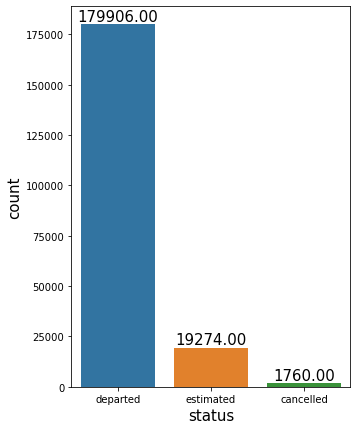

In [13]:
df_status = df.groupby('status').size().reset_index(name="count").sort_values(by="count",ascending=False)

plt.figure(figsize=(5, 7))
plots = sns.barplot(x="status", y="count", data=df_status)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("status", size=15)
plt.ylabel("count",size=15)
plt.show()

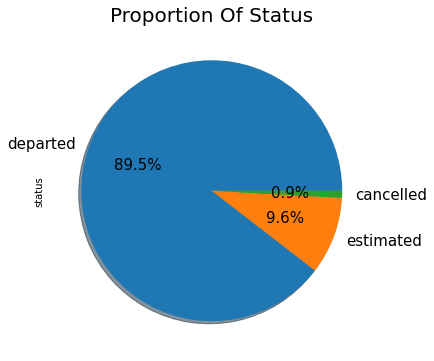

In [14]:
df["status"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=15,
    figsize=(6,6),
    shadow=True
    
)
plt.title('Proportion of status'.title() , fontsize=20);

In [15]:
x = df.groupby(['line', 'status']).size().unstack()
x['cancelled']/(x['departed']+x['estimated'])

line
Atl. City Line       0.008115
Bergen Co. Line      0.003322
Gladstone Branch     0.016248
Main Line            0.000885
Montclair-Boonton    0.010328
Morristown Line      0.007061
No Jersey Coast      0.013167
Northeast Corrdr     0.015451
Pascack Valley       0.001561
Princeton Shuttle         NaN
Raritan Valley       0.003927
dtype: float64

In [16]:
x['cancelled']

line
Atl. City Line        47.0
Bergen Co. Line       55.0
Gladstone Branch     256.0
Main Line             17.0
Montclair-Boonton    158.0
Morristown Line      227.0
No Jersey Coast      414.0
Northeast Corrdr     499.0
Pascack Valley        18.0
Princeton Shuttle      NaN
Raritan Valley        69.0
Name: cancelled, dtype: float64

### A . Northeast Corridor is having highest cancellations and the Princeton Shuttle has no cancellations.

## 2. Busiest Line:
### Q. Which is busiest line and what portion of line it takes?

In [17]:
df['line'].nunique()

11

In [18]:
df['line'].unique()

array(['Main Line', 'No Jersey Coast', 'Bergen Co. Line ',
       'Montclair-Boonton', 'Pascack Valley', 'Northeast Corrdr',
       'Morristown Line', 'Atl. City Line', 'Princeton Shuttle',
       'Raritan Valley', 'Gladstone Branch'], dtype=object)

In [19]:
df_busy_line = df.groupby('line').size().reset_index(name="count").sort_values(by="count",ascending=False)
df_busy_line.head()

,line,count
7,Northeast Corrdr,32795
5,Morristown Line,32376
6,No Jersey Coast,31857
3,Main Line,19227
10,Raritan Valley,17641


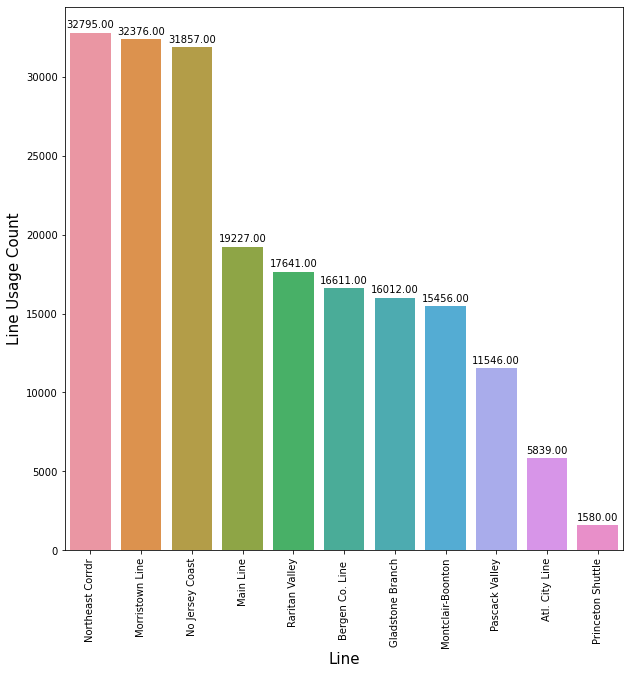

In [20]:
plt.figure(figsize=(10, 10))
plots = sns.barplot(x="line", y="count", data=df_busy_line)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Line", size=15)
plt.ylabel("Line Usage Count",size=15)
plt.xticks(rotation = 90)
plt.show()

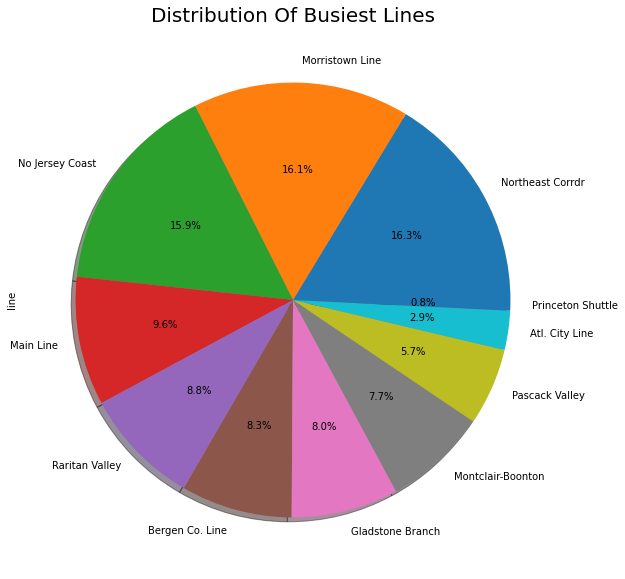

In [21]:
df["line"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=10,
    figsize=(10,10),
    shadow=True
    
)
plt.title('Distribution of Busiest Lines'.title() , fontsize=20);

### A. There are 11 lines, out of these Northeast Corridor line is busiest and Princeton Shuttle is least busy.

## 3. Delays:
### Q. On which line maximum delay occurs in terms of average time and maximum time?

In [22]:
delay_train_id = df.sort_values(by = 'delay_minutes', ascending=False)
delay_train_id

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
178184,2020-03-24,9225,6.0,Glen Ridge,50,Bay Street,14,2020-03-24 13:48:00,2020-03-24 16:24:25,156.416667,departed,Montclair-Boonton,NJ Transit
178187,2020-03-24,9225,9.0,Watchung Avenue,153,Upper Montclair,150,2020-03-24 13:56:00,2020-03-24 16:32:17,156.283333,departed,Montclair-Boonton,NJ Transit
171947,2020-03-23,9225,5.0,Bloomfield,19,Glen Ridge,50,2020-03-23 13:45:00,2020-03-23 16:20:34,155.566667,departed,Montclair-Boonton,NJ Transit
171946,2020-03-23,9225,4.0,Watsessing Avenue,154,Bloomfield,19,2020-03-23 13:42:00,2020-03-23 16:17:14,155.233333,departed,Montclair-Boonton,NJ Transit
185929,2020-03-25,9225,5.0,Bloomfield,19,Glen Ridge,50,2020-03-25 13:45:00,2020-03-25 16:20:06,155.100000,departed,Montclair-Boonton,NJ Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124837,2020-03-16,1001,9.0,Watchung Avenue,153,Upper Montclair,150,2020-03-16 14:39:00,2020-03-16 14:38:10,0.000000,departed,Montclair-Boonton,NJ Transit
124822,2020-03-16,4128,2.0,Princeton,124,Princeton Junction,125,2020-03-16 10:23:00,2020-03-16 10:23:00,0.000000,estimated,Princeton Shuttle,NJ Transit
124792,2020-03-16,4126,2.0,Princeton,124,Princeton Junction,125,2020-03-16 09:57:00,2020-03-16 09:57:00,0.000000,estimated,Princeton Shuttle,NJ Transit
124776,2020-03-16,6671,4.0,Newark Broad Street,106,Brick Church,23,2020-03-16 21:17:00,2020-03-16 21:16:04,0.000000,departed,Morristown Line,NJ Transit


In [23]:
df_delay_line = df.groupby('line')['delay_minutes'].agg(np.max).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)
df_delay_line.head()

,line,delay_minutes
4,Montclair-Boonton,156.416667
0,Atl. City Line,130.850000
7,Northeast Corrdr,100.383333
6,No Jersey Coast,100.166667
2,Gladstone Branch,99.000000


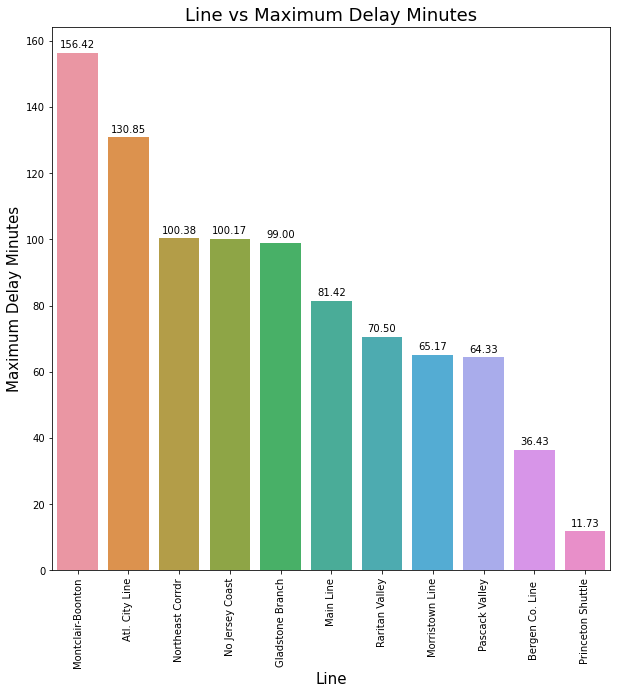

In [24]:
plt.figure(figsize=(10, 10))
plots = sns.barplot(x="line", y="delay_minutes", data=df_delay_line)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Line", size=15)
plt.ylabel("Maximum Delay Minutes",size=15)
plt.title("Line vs Maximum Delay Minutes", size = 18)
plt.xticks(rotation = 90)
plt.show()

### A. Maximum delay happening on Montclair-Boonton line and the time was 156.42 minutes.

In [25]:
df_delay_line = df.groupby('line')['delay_minutes'].agg(np.mean).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)
df_delay_line

,line,delay_minutes
0,Atl. City Line,15.260518
4,Montclair-Boonton,4.912225
10,Raritan Valley,3.350083
3,Main Line,3.284914
5,Morristown Line,3.179827
7,Northeast Corrdr,3.080787
8,Pascack Valley,3.066710
6,No Jersey Coast,3.016277
1,Bergen Co. Line,2.824025
2,Gladstone Branch,2.501270


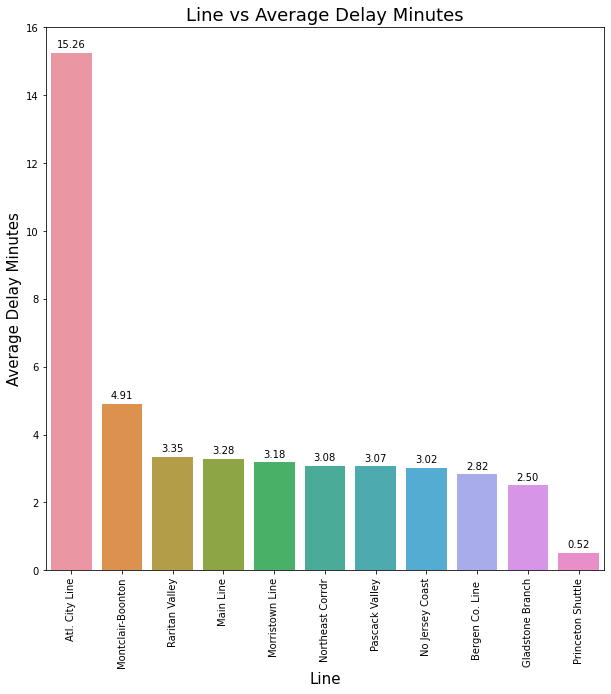

In [26]:
plt.figure(figsize=(10, 10))
plots = sns.barplot(x="line", y="delay_minutes", data=df_delay_line)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Line", size=15)
plt.ylabel("Average Delay Minutes",size=15)
plt.title("Line vs Average Delay Minutes", size =18)
plt.xticks(rotation = 90)
plt.show()

### A. Average delay happening on Atl. City Line and it is of 15.26 minutes over the period of 1 month.

## 4. Delay by Week Days:
### Q. On which days the maximum/minimum average and total delay occured?

In [27]:
df['date'] = pd.to_datetime(df['date']) 
df['day_of_week'] = df['date'].dt.day_name()
week_avg_delay = df.groupby('day_of_week')['delay_minutes'].agg(np.mean).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)
week_avg_delay

<ipython-input-27-6f47e4479c54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-27-6f47e4479c54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['date'].dt.day_name()


,day_of_week,delay_minutes
0,Friday,4.150689
2,Saturday,3.759196
3,Sunday,3.627328
4,Thursday,3.455561
1,Monday,3.444930
5,Tuesday,3.318998
6,Wednesday,3.229860


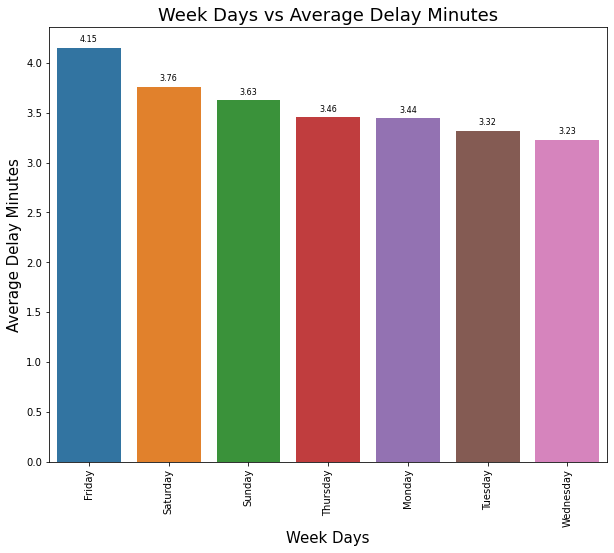

In [28]:
plt.figure(figsize=(10, 8))
plots = sns.barplot(x="day_of_week", y="delay_minutes", data=week_avg_delay)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Week Days", size=15)
plt.ylabel("Average Delay Minutes",size=15)
plt.title("Week Days vs Average Delay Minutes", size =18)
plt.xticks(rotation = 90)
plt.show()

### A. From above graph we can clearly say that the maximum average delay takes place on Friday and minimum on Wednesday.

In [29]:
df['date'] = pd.to_datetime(df['date']) 
df['day_of_week'] = df['date'].dt.day_name()
week_avg_delay = df.groupby('day_of_week')['delay_minutes'].agg(np.max).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)
week_avg_delay

<ipython-input-29-111b8df64989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-29-111b8df64989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['date'].dt.day_name()


,day_of_week,delay_minutes
5,Tuesday,156.416667
1,Monday,155.566667
6,Wednesday,155.100000
4,Thursday,151.916667
0,Friday,150.183333
2,Saturday,130.850000
3,Sunday,115.033333


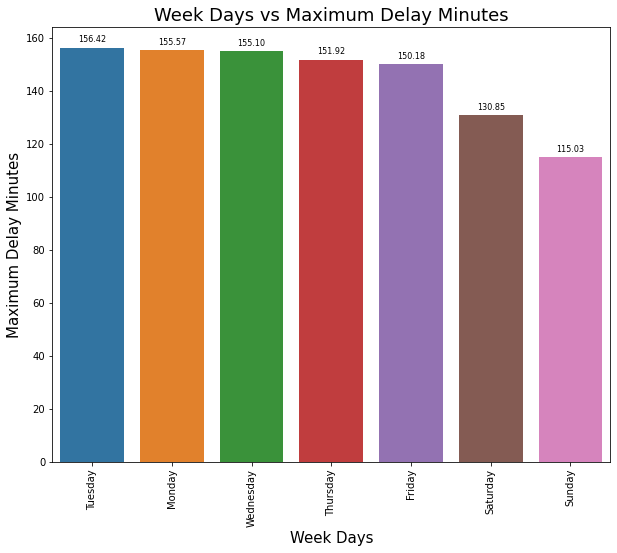

In [30]:
plt.figure(figsize=(10, 8))
plots = sns.barplot(x="day_of_week", y="delay_minutes", data=week_avg_delay)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Week Days", size=15)
plt.ylabel("Maximum Delay Minutes",size=15)
plt.title("Week Days vs Maximum Delay Minutes", size =18)
plt.xticks(rotation = 90)
plt.show()

### A. From above graph we can clearly say that the maximum delay takes place on Tuesday and minimum on Sunday.

# 5. Delay by Date of Month:
## Q. On which day longest and shortest delay took place?

In [31]:
df_delay_mon = df.groupby('date')['delay_minutes'].agg(np.mean).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)
df_delay_mon.head()

,date,delay_minutes
12,2020-03-13,6.363234
14,2020-03-15,4.310884
0,2020-03-01,4.169863
22,2020-03-23,4.092552
20,2020-03-21,4.053134


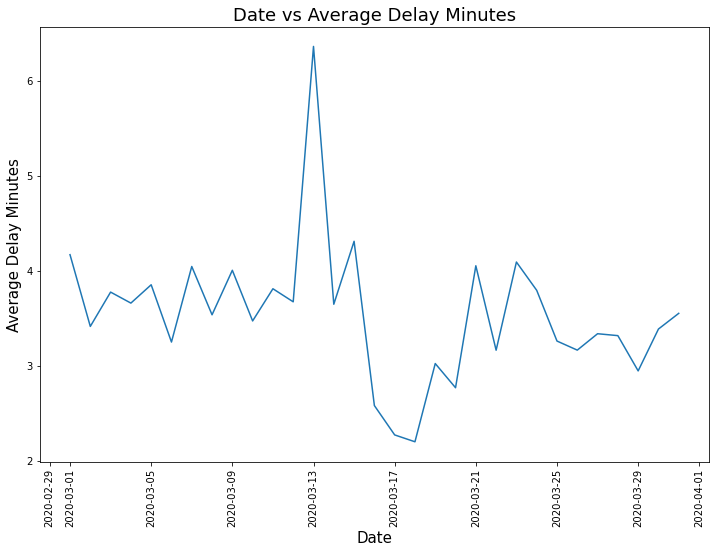

In [32]:
plt.figure(figsize=(12, 8))
plots = sns.lineplot(x="date", y="delay_minutes", data=df_delay_mon)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Date", size=15)
plt.ylabel("Average Delay Minutes",size=15)
plt.title("Date vs Average Delay Minutes", size =18)
plt.xticks(rotation = 90)
plt.show()

### A. Peak delay seem to be on 13/03/2020 and shortest delay observed on 18/03/2020.

## 6. What are the causes of delay?¶
Let's look at lines, stops, origins, and destinations to see if there is any relationship with delays or cancellations

### Q. Are these delays due to longer stopages?

In [33]:
df_stop_seq = df.groupby('stop_sequence')['delay_minutes'].agg(np.mean).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)
df_stop_seq.head()

,stop_sequence,delay_minutes
8,9.0,4.108333
6,7.0,4.082233
7,8.0,4.055660
4,5.0,4.034284
3,4.0,3.990885


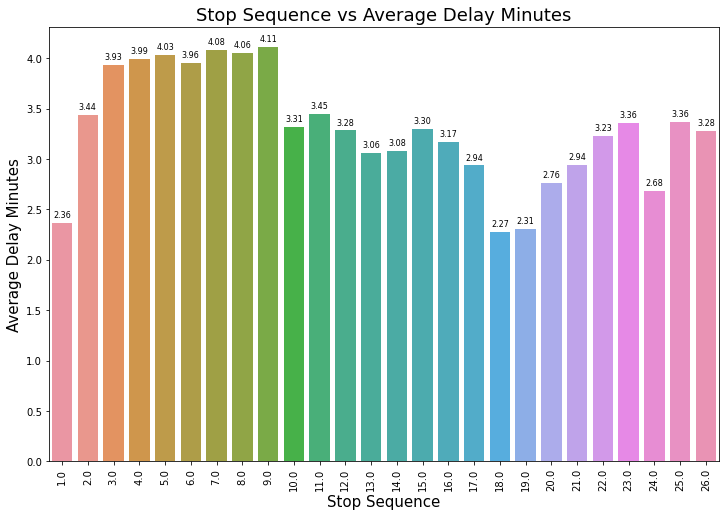

In [34]:
plt.figure(figsize=(12, 8))
plots = sns.barplot(x="stop_sequence", y="delay_minutes", data=df_stop_seq)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Stop Sequence", size=15)
plt.ylabel("Average Delay Minutes",size=15)
plt.title("Stop Sequence vs Average Delay Minutes", size =18)
plt.xticks(rotation = 90)
plt.show()

In [35]:
df_stop_seq = df.groupby('stop_sequence')['delay_minutes'].agg(np.max).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)
df_stop_seq.head()

,stop_sequence,delay_minutes
5,6.0,156.416667
8,9.0,156.283333
4,5.0,155.566667
3,4.0,155.233333
7,8.0,154.800000


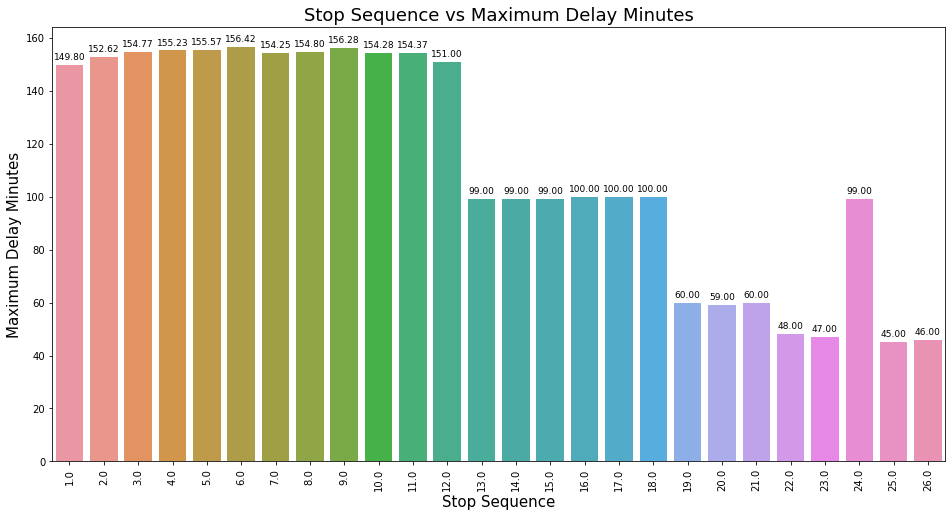

In [36]:
plt.figure(figsize=(16, 8))
plots = sns.barplot(x="stop_sequence", y="delay_minutes", data=df_stop_seq)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Stop Sequence", size=15)
plt.ylabel("Maximum Delay Minutes",size=15)
plt.title("Stop Sequence vs Maximum Delay Minutes", size = 18)
plt.xticks(rotation = 90)
plt.show()

### A. It can be seen from above graphs that Number of Stoppage/stop sequence are not related to delay time. 

### Q. Are delay depends on destination station?

In [37]:
df_to = df.groupby('to')['delay_minutes'].agg(np.sum).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)[:10]
df_to.head()

,to,delay_minutes
135,Secaucus Upper Lvl,22858.500000
102,Newark Broad Street,17036.300000
100,New York Penn Station,16789.550000
103,Newark Penn Station,15002.266667
101,Newark Airport,12751.666667


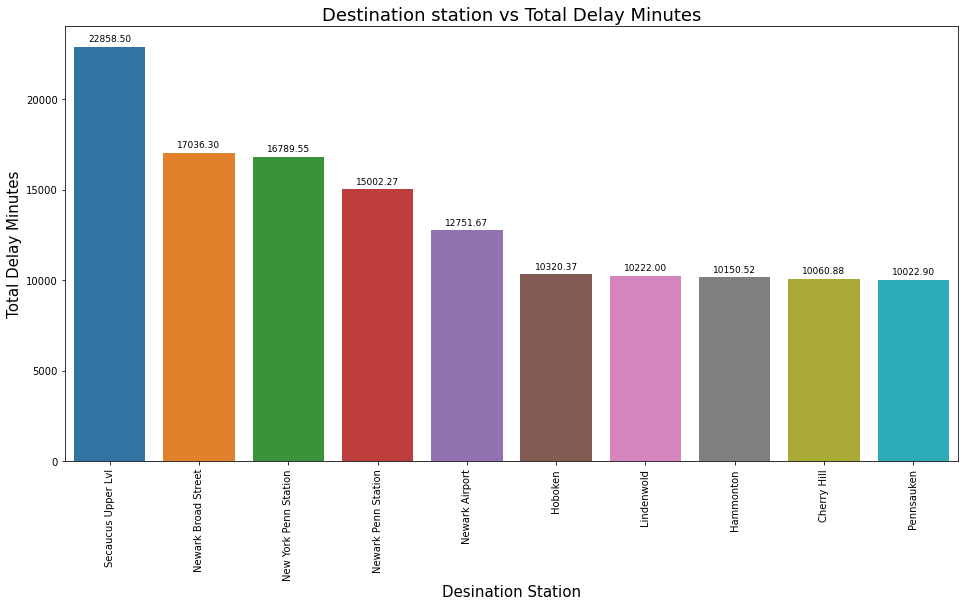

In [38]:
plt.figure(figsize=(16, 8))
plots = sns.barplot(x="to", y="delay_minutes", data=df_to)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Desination Station", size=15)
plt.ylabel("Total Delay Minutes",size=15)
plt.title("Destination station vs Total Delay Minutes", size = 18)
plt.xticks(rotation = 90)
plt.show()

### A. Maximum total delay time for destination station is 22858.50 minutes for Secaucus Upper Lvl

In [39]:
df_to = df.groupby('to')['delay_minutes'].agg(np.mean).reset_index(name="delay_minutes").sort_values(by="delay_minutes",ascending=False)[:10]
df_to.head()

,to,delay_minutes
65,Lindenwold,15.750385
51,Hammonton,15.640241
25,Cherry Hill,15.526055
35,Egg Harbor City,15.454347
114,Pennsauken,15.443606


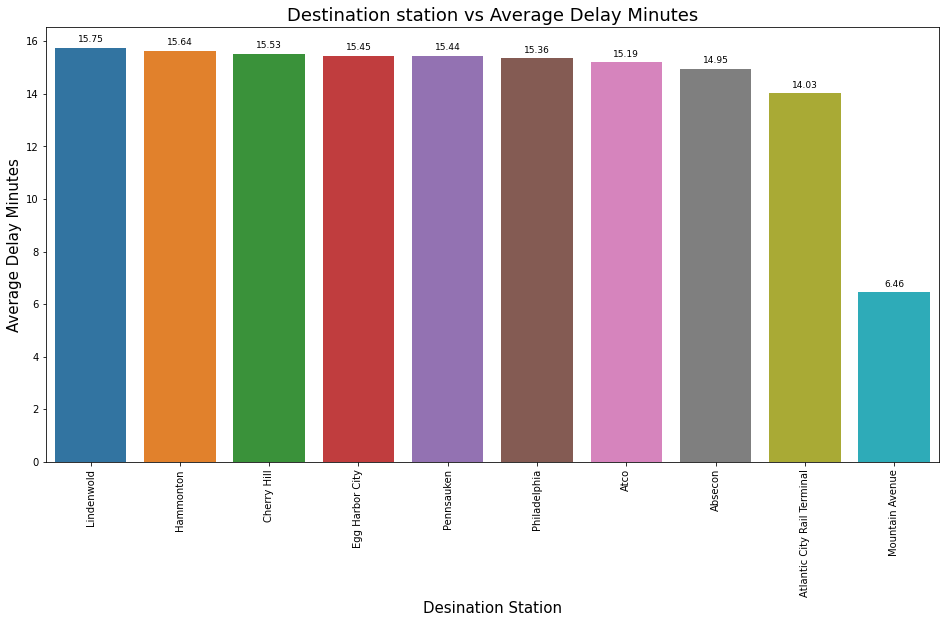

In [40]:
plt.figure(figsize=(16, 8))
plots = sns.barplot(x="to", y="delay_minutes", data=df_to)
for bar in plots.patches:
   
  # passing the coordinates where the annotation shall be done. x-coordinate: bar.get_x() + bar.get_width() / 2, y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Desination Station", size=15)
plt.ylabel("Average Delay Minutes",size=15)
plt.title("Destination station vs Average Delay Minutes", size = 18)
plt.xticks(rotation = 90)
plt.show()

### A. Maximum total average delay time for destination station is Lindenwold

# Predictive Modeling

<AxesSubplot:xlabel='delay_minutes', ylabel='stop_sequence'>

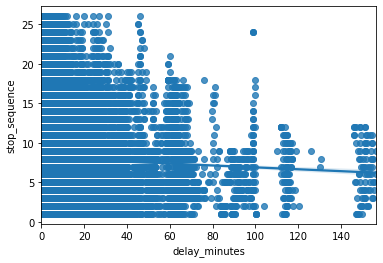

In [41]:
sns.regplot(x = 'delay_minutes', y = 'stop_sequence', data = df)

<AxesSubplot:xlabel='delay_minutes', ylabel='from_id'>

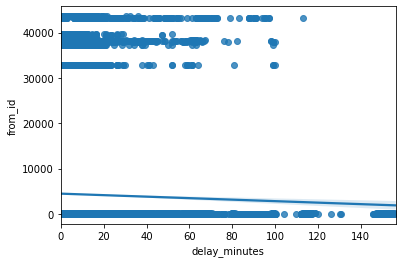

In [42]:
sns.regplot(x = 'delay_minutes', y = 'from_id', data = df)

<AxesSubplot:xlabel='delay_minutes', ylabel='to_id'>

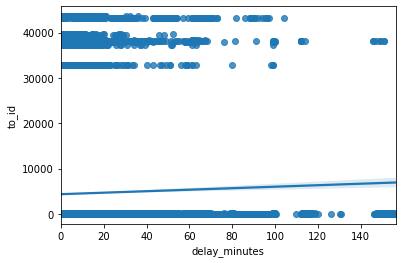

In [43]:
sns.regplot(x = 'delay_minutes', y = 'to_id', data = df)

In [44]:
df.corr()

,stop_sequence,from_id,to_id,delay_minutes
stop_sequence,1.000000,0.026258,-0.029232,-0.018911
from_id,0.026258,1.000000,-0.094815,-0.010890
to_id,-0.029232,-0.094815,1.000000,0.010872
delay_minutes,-0.018911,-0.010890,0.010872,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200940 entries, 0 to 222759
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            200940 non-null  datetime64[ns]
 1   train_id        200940 non-null  object        
 2   stop_sequence   200940 non-null  float64       
 3   from            200940 non-null  object        
 4   from_id         200940 non-null  int64         
 5   to              200940 non-null  object        
 6   to_id           200940 non-null  int64         
 7   scheduled_time  200940 non-null  object        
 8   actual_time     200940 non-null  object        
 9   delay_minutes   200940 non-null  float64       
 10  status          200940 non-null  object        
 11  line            200940 non-null  object        
 12  type            200940 non-null  object        
 13  day_of_week     200940 non-null  object        
dtypes: datetime64[ns](1), float64(2), in

In [46]:
dummy_line =pd.get_dummies(df['line'],prefix='line')

In [47]:
print(df.shape)

(200940, 14)


In [48]:
column_name=df.columns.values.tolist()
df1=df[column_name].join(dummy_line)

In [49]:
df1.shape

(200940, 25)

In [50]:
df1

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,...,line_Bergen Co. Line,line_Gladstone Branch,line_Main Line,line_Montclair-Boonton,line_Morristown Line,line_No Jersey Coast,line_Northeast Corrdr,line_Pascack Valley,line_Princeton Shuttle,line_Raritan Valley
0,2020-03-01,1837,1.0,Hoboken,63,Hoboken,63,2020-03-01 22:15:00,2020-03-01 22:16:06,1.100000,...,0,0,1,0,0,0,0,0,0,0
1,2020-03-01,1837,2.0,Hoboken,63,Secaucus Lower Lvl,38174,2020-03-01 22:25:00,2020-03-01 22:26:04,1.066667,...,0,0,1,0,0,0,0,0,0,0
2,2020-03-01,1837,3.0,Secaucus Lower Lvl,38174,Kingsland,66,2020-03-01 22:31:00,2020-03-01 22:33:37,2.616667,...,0,0,1,0,0,0,0,0,0,0
3,2020-03-01,1837,4.0,Kingsland,66,Lyndhurst,75,2020-03-01 22:34:00,2020-03-01 22:35:04,1.066667,...,0,0,1,0,0,0,0,0,0,0
4,2020-03-01,1837,5.0,Lyndhurst,75,Delawanna,33,2020-03-01 22:36:00,2020-03-01 22:38:01,2.016667,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222755,2020-03-31,7883,6.0,Metuchen,84,Edison,38,2020-03-31 23:42:00,2020-03-31 23:42:08,0.133333,...,0,0,0,0,0,0,1,0,0,0
222756,2020-03-31,7883,7.0,Edison,38,New Brunswick,103,2020-03-31 23:46:00,2020-03-31 23:46:00,0.000000,...,0,0,0,0,0,0,1,0,0,0
222757,2020-03-31,7883,8.0,New Brunswick,103,Princeton Junction,125,2020-04-01 00:02:00,2020-04-01 00:01:00,0.000000,...,0,0,0,0,0,0,1,0,0,0
222758,2020-03-31,7883,9.0,Princeton Junction,125,Hamilton,32905,2020-04-01 00:08:00,2020-04-01 00:07:06,0.000000,...,0,0,0,0,0,0,1,0,0,0


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200940 entries, 0 to 222759
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    200940 non-null  datetime64[ns]
 1   train_id                200940 non-null  object        
 2   stop_sequence           200940 non-null  float64       
 3   from                    200940 non-null  object        
 4   from_id                 200940 non-null  int64         
 5   to                      200940 non-null  object        
 6   to_id                   200940 non-null  int64         
 7   scheduled_time          200940 non-null  object        
 8   actual_time             200940 non-null  object        
 9   delay_minutes           200940 non-null  float64       
 10  status                  200940 non-null  object        
 11  line                    200940 non-null  object        
 12  type                    200940

In [52]:
df1.corr()

,stop_sequence,from_id,to_id,delay_minutes,line_Atl. City Line,line_Bergen Co. Line,line_Gladstone Branch,line_Main Line,line_Montclair-Boonton,line_Morristown Line,line_No Jersey Coast,line_Northeast Corrdr,line_Pascack Valley,line_Princeton Shuttle,line_Raritan Valley
stop_sequence,1.000000,0.026258,-0.029232,-0.018911,-0.104636,-0.013936,0.127326,0.064909,-0.019373,0.091063,-0.032155,-0.110692,0.030445,-0.115479,-0.016649
from_id,0.026258,1.000000,-0.094815,-0.010890,0.005805,0.053629,-0.105404,-0.002693,0.008543,-0.099533,0.029362,0.158202,-0.036957,-0.031794,-0.034880
to_id,-0.029232,-0.094815,1.000000,0.010872,0.005801,0.054428,-0.105410,-0.002707,0.005758,-0.100733,0.032500,0.157690,-0.036960,-0.031793,-0.034832
delay_minutes,-0.018911,-0.010890,0.010872,1.000000,0.254920,-0.026867,-0.038271,-0.010270,0.049925,-0.019625,-0.028359,-0.025273,-0.014567,-0.033773,-0.007254
line_Atl. City Line,-0.104636,0.005805,0.005801,0.254920,1.000000,-0.051933,-0.050905,-0.056273,-0.049938,-0.075817,-0.075092,-0.076401,-0.042714,-0.015401,-0.053669
line_Bergen Co. Line,-0.013936,0.053629,0.054428,-0.026867,-0.051933,1.000000,-0.088333,-0.097648,-0.086656,-0.131562,-0.130303,-0.132575,-0.074120,-0.026725,-0.093128
line_Gladstone Branch,0.127326,-0.105404,-0.105410,-0.038271,-0.050905,-0.088333,1.000000,-0.095716,-0.084941,-0.128959,-0.127724,-0.129952,-0.072653,-0.026196,-0.091286
line_Main Line,0.064909,-0.002693,-0.002707,-0.010270,-0.056273,-0.097648,-0.095716,1.000000,-0.093898,-0.142558,-0.141194,-0.143656,-0.080315,-0.028958,-0.100912
line_Montclair-Boonton,-0.019373,0.008543,0.005758,0.049925,-0.049938,-0.086656,-0.084941,-0.093898,1.000000,-0.126510,-0.125299,-0.127484,-0.071273,-0.025698,-0.089552
line_Morristown Line,0.091063,-0.099533,-0.100733,-0.019625,-0.075817,-0.131562,-0.128959,-0.142558,-0.126510,1.000000,-0.190231,-0.193549,-0.108209,-0.039016,-0.135960


In [53]:
dummy_line =pd.get_dummies(df1['day_of_week'],prefix='day_of_week')

In [54]:
column_name=df1.columns.values.tolist()
df2=df1[column_name].join(dummy_line)

In [55]:
df2.shape

(200940, 32)

In [56]:
df2

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,...,line_Pascack Valley,line_Princeton Shuttle,line_Raritan Valley,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2020-03-01,1837,1.0,Hoboken,63,Hoboken,63,2020-03-01 22:15:00,2020-03-01 22:16:06,1.100000,...,0,0,0,0,0,0,1,0,0,0
1,2020-03-01,1837,2.0,Hoboken,63,Secaucus Lower Lvl,38174,2020-03-01 22:25:00,2020-03-01 22:26:04,1.066667,...,0,0,0,0,0,0,1,0,0,0
2,2020-03-01,1837,3.0,Secaucus Lower Lvl,38174,Kingsland,66,2020-03-01 22:31:00,2020-03-01 22:33:37,2.616667,...,0,0,0,0,0,0,1,0,0,0
3,2020-03-01,1837,4.0,Kingsland,66,Lyndhurst,75,2020-03-01 22:34:00,2020-03-01 22:35:04,1.066667,...,0,0,0,0,0,0,1,0,0,0
4,2020-03-01,1837,5.0,Lyndhurst,75,Delawanna,33,2020-03-01 22:36:00,2020-03-01 22:38:01,2.016667,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222755,2020-03-31,7883,6.0,Metuchen,84,Edison,38,2020-03-31 23:42:00,2020-03-31 23:42:08,0.133333,...,0,0,0,0,0,0,0,0,1,0
222756,2020-03-31,7883,7.0,Edison,38,New Brunswick,103,2020-03-31 23:46:00,2020-03-31 23:46:00,0.000000,...,0,0,0,0,0,0,0,0,1,0
222757,2020-03-31,7883,8.0,New Brunswick,103,Princeton Junction,125,2020-04-01 00:02:00,2020-04-01 00:01:00,0.000000,...,0,0,0,0,0,0,0,0,1,0
222758,2020-03-31,7883,9.0,Princeton Junction,125,Hamilton,32905,2020-04-01 00:08:00,2020-04-01 00:07:06,0.000000,...,0,0,0,0,0,0,0,0,1,0


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200940 entries, 0 to 222759
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    200940 non-null  datetime64[ns]
 1   train_id                200940 non-null  object        
 2   stop_sequence           200940 non-null  float64       
 3   from                    200940 non-null  object        
 4   from_id                 200940 non-null  int64         
 5   to                      200940 non-null  object        
 6   to_id                   200940 non-null  int64         
 7   scheduled_time          200940 non-null  object        
 8   actual_time             200940 non-null  object        
 9   delay_minutes           200940 non-null  float64       
 10  status                  200940 non-null  object        
 11  line                    200940 non-null  object        
 12  type                    200940

In [58]:
df2.corr()

,stop_sequence,from_id,to_id,delay_minutes,line_Atl. City Line,line_Bergen Co. Line,line_Gladstone Branch,line_Main Line,line_Montclair-Boonton,line_Morristown Line,...,line_Pascack Valley,line_Princeton Shuttle,line_Raritan Valley,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
stop_sequence,1.000000,0.026258,-0.029232,-0.018911,-0.104636,-0.013936,0.127326,0.064909,-0.019373,0.091063,...,0.030445,-0.115479,-0.016649,-0.000406,0.002387,-0.003655,-0.002513,0.001005,0.000266,0.001590
from_id,0.026258,1.000000,-0.094815,-0.010890,0.005805,0.053629,-0.105404,-0.002693,0.008543,-0.099533,...,-0.036957,-0.031794,-0.034880,-0.002754,-0.003340,0.005517,0.007696,-0.000618,-0.001734,-0.002307
to_id,-0.029232,-0.094815,1.000000,0.010872,0.005801,0.054428,-0.105410,-0.002707,0.005758,-0.100733,...,-0.036960,-0.031793,-0.034832,-0.003069,-0.003494,0.006525,0.008722,-0.001148,-0.001976,-0.002735
delay_minutes,-0.018911,-0.010890,0.010872,1.000000,0.254920,-0.026867,-0.038271,-0.010270,0.049925,-0.019625,...,-0.014567,-0.033773,-0.007254,0.030952,-0.005412,0.008730,0.003997,-0.004270,-0.012614,-0.016516
line_Atl. City Line,-0.104636,0.005805,0.005801,0.254920,1.000000,-0.051933,-0.050905,-0.056273,-0.049938,-0.075817,...,-0.042714,-0.015401,-0.053669,-0.001363,-0.005806,0.032558,0.025362,-0.016352,-0.013458,-0.009474
line_Bergen Co. Line,-0.013936,0.053629,0.054428,-0.026867,-0.051933,1.000000,-0.088333,-0.097648,-0.086656,-0.131562,...,-0.074120,-0.026725,-0.093128,-0.002475,-0.002893,0.000181,0.004507,0.001412,0.000688,-0.000686
line_Gladstone Branch,0.127326,-0.105404,-0.105410,-0.038271,-0.050905,-0.088333,1.000000,-0.095716,-0.084941,-0.128959,...,-0.072653,-0.026196,-0.091286,0.030475,0.039808,-0.091623,-0.102596,0.023170,0.027791,0.036229
line_Main Line,0.064909,-0.002693,-0.002707,-0.010270,-0.056273,-0.097648,-0.095716,1.000000,-0.093898,-0.142558,...,-0.080315,-0.028958,-0.100912,-0.005794,-0.015721,0.038182,0.045767,-0.018050,-0.009553,-0.019025
line_Montclair-Boonton,-0.019373,0.008543,0.005758,0.049925,-0.049938,-0.086656,-0.084941,-0.093898,1.000000,-0.126510,...,-0.071273,-0.025698,-0.089552,-0.003001,0.023884,-0.060669,-0.069287,0.030066,0.022305,0.031225
line_Morristown Line,0.091063,-0.099533,-0.100733,-0.019625,-0.075817,-0.131562,-0.128959,-0.142558,-0.126510,1.000000,...,-0.108209,-0.039016,-0.135960,-0.004765,0.004089,0.000117,-0.006281,0.000934,0.003695,0.000674


In [59]:
df3 = df2.drop(columns =['date','train_id','from','to','scheduled_time','actual_time','status','line','type','day_of_week'], inplace = False)

<AxesSubplot:>

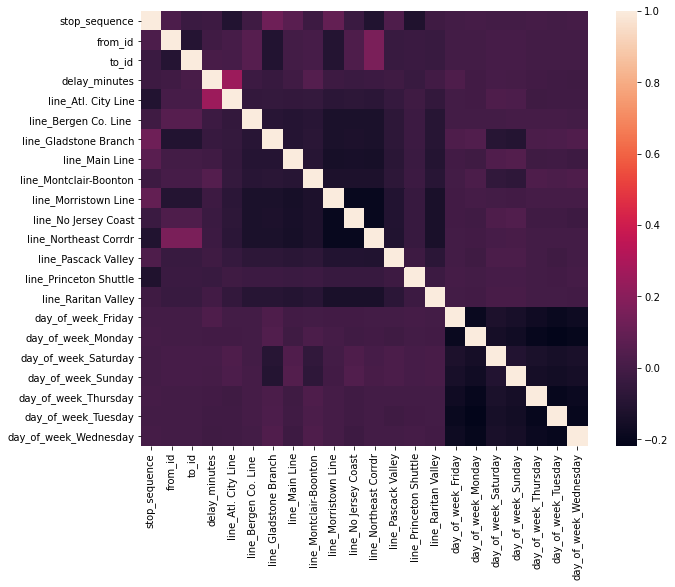

In [60]:
plt.subplots(figsize=(10,8))
sns.heatmap(df3.corr())

In [61]:
X = df3.drop('delay_minutes', axis = 1)

In [62]:
X

,stop_sequence,from_id,to_id,line_Atl. City Line,line_Bergen Co. Line,line_Gladstone Branch,line_Main Line,line_Montclair-Boonton,line_Morristown Line,line_No Jersey Coast,...,line_Pascack Valley,line_Princeton Shuttle,line_Raritan Valley,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1.0,63,63,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.0,63,38174,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3.0,38174,66,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4.0,66,75,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5.0,75,33,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222755,6.0,84,38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
222756,7.0,38,103,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
222757,8.0,103,125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
222758,9.0,125,32905,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
Y = df3['delay_minutes']

In [64]:
Y

0         1.100000
1         1.066667
2         2.616667
3         1.066667
4         2.016667
            ...   
222755    0.133333
222756    0.000000
222757    0.000000
222758    0.000000
222759    0.000000
Name: delay_minutes, Length: 200940, dtype: float64

## Modeling
Using sklearn package to model the data.

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [66]:
lm.fit(X,Y)

LinearRegression()

In [67]:
print (lm.intercept_)
print (lm.coef_)

4.027464726645975
[ 1.39593948e-02 -9.85096878e-06  3.67412113e-06  1.11978714e+01
 -1.25243513e+00 -1.64594817e+00 -8.31583611e-01  8.49565213e-01
 -9.42730271e-01 -1.07435778e+00 -9.70471928e-01 -1.05350685e+00
 -3.52512097e+00 -7.51281926e-01  6.22159437e-01 -9.56039223e-02
  3.65022270e-02 -2.75649151e-02 -4.48909101e-02 -1.92325819e-01
 -2.98276098e-01]


In [68]:
lm.score(X,Y)

0.07193619857782774

## Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

In [69]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2, random_state = 42)
lm = LinearRegression()
lm.fit(trainX, trainY)

LinearRegression()

In [70]:
print (lm.intercept_)
print (lm.coef_)

4.035665177419485
[ 1.18994831e-02 -9.88519726e-06  3.72343299e-06  1.11207850e+01
 -1.26659826e+00 -1.64555230e+00 -8.34615712e-01  8.42979534e-01
 -9.26494626e-01 -1.04570001e+00 -9.88158634e-01 -9.96549330e-01
 -3.53607650e+00 -7.24019130e-01  5.47791486e-01 -3.83425125e-02
  8.01402941e-02 -5.92363390e-02 -3.46605957e-02 -2.07170430e-01
 -2.88521903e-01]


In [71]:
lm.score(trainX, trainY)

0.07193249232812293

In [72]:
lm.score(testX, testY)

0.07175500379845301

In [73]:
predictions = lm.predict(testX)

## Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

- Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

- Root Mean Squared Error (RMSE).

- R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [74]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE: %.2f' % metrics.mean_absolute_error(testY, predictions))
print('MSE: %.2f' % metrics.mean_squared_error(testY, predictions))
print('RMSE: %.2f' %  np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('R2-score: %.2f' % r2_score(testY , predictions) )

MAE: 3.22
MSE: 58.70
RMSE: 7.66
R2-score: 0.07


In [75]:
!pip install xgboost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = "reg:squarederror")
xgb_model.fit(trainX, trainY)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
xgb_model.score(trainX, trainY)

0.16092158379440247

In [77]:
xgb_model.score(testX, testY)

0.12779541378240722

In [78]:
predictions = lm.predict(testX)

In [79]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE: %.2f' % metrics.mean_absolute_error(testY, predictions))
print('MSE: %.2f' % metrics.mean_squared_error(testY, predictions))
print('RMSE: %.2f' %  np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('R2-score: %.2f' % r2_score(testY , predictions) )

MAE: 3.22
MSE: 58.70
RMSE: 7.66
R2-score: 0.07


## Conclusion:
The model is giving very low accuracy and R2-score. Further evaluation required. 